Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score,confusion_matrix,classification_report

Load dataset

In [2]:
df=pd.read_csv(r"C:\Users\balak\guvi\customer\train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


Clean dataset

Remove duplicates

In [3]:
df=df.drop_duplicates()
df.shape

(45205, 11)

Missing values(no Nan values)

In [87]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Data type conversion ( no incorrect format)

In [88]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [89]:
cat_col=cat_col = df.select_dtypes(include=['object','datetime64[ns]']).columns
cat_col

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

In [4]:
cont_col=cat_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cont_col

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

Checking Skewness and Outliers

In [91]:
from scipy.stats import skew
for column in cont_col:
  print(f"Column : {column}")
  skewness = skew(df[column])
  print("Skewness:", skewness)

  print("*******************")

Column : age
Skewness: 0.6846225907576436
*******************
Column : day
Skewness: 0.09300545215702359
*******************
Column : dur
Skewness: 3.144041014830494
*******************
Column : num_calls
Skewness: 4.8982901462296935
*******************


In [92]:
#checking outlier
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")

    print(df[column].describe())
    print('**********************')

Column : age
UpperThreshold : 70.5 and lowerThreshold : 10.5
count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
**********************
Column : day
UpperThreshold : 40.5 and lowerThreshold : -11.5
count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64
**********************
Column : dur
UpperThreshold : 643.0 and lowerThreshold : -221.0
count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64
**********************
Column : num_calls
UpperThreshold : 6.0 and lowerThreshold : -2.0
count    45205.000000
mean         2.763898
std          3.098189
min          1

In [93]:
def plot(df,column):
  #boxplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.boxplot(x=df[column], color='skyblue')
  plt.xlabel(column)
  plt.title("Box Plot of "+" "+column)

  #distplot

  plt.subplot(1,3,2)
  sns.distplot(df[column],kde=True,color='blue')
  plt.xlabel(column)
  plt.ylabel("count")
  plt.title("Distplot for"+" "+column)

  #violinplot

  plt.subplot(1,3,3)
  sns.violinplot(data=df, x=column)
  plt.title("violin plot for"+" "+column)

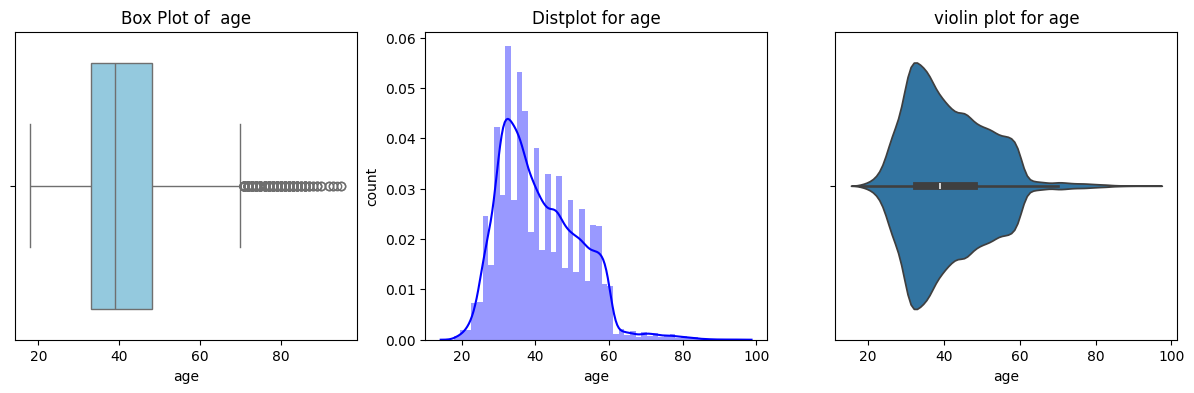

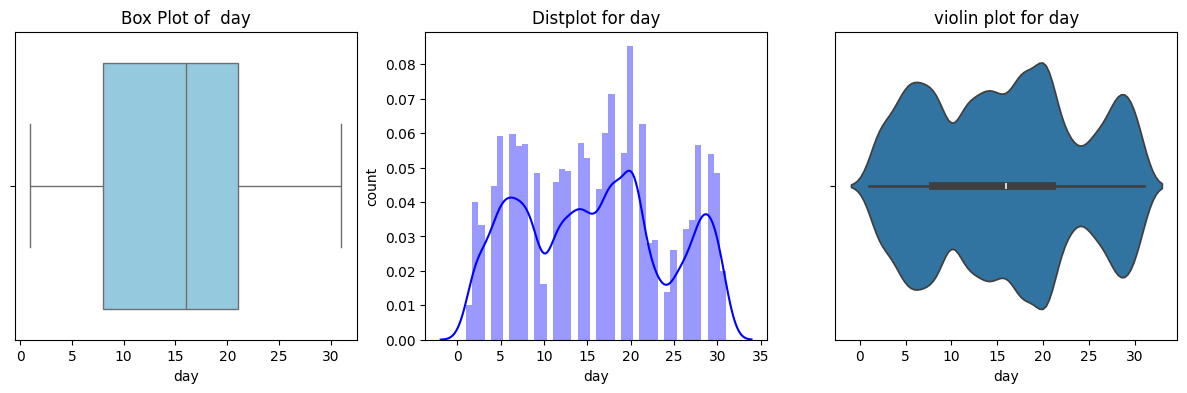

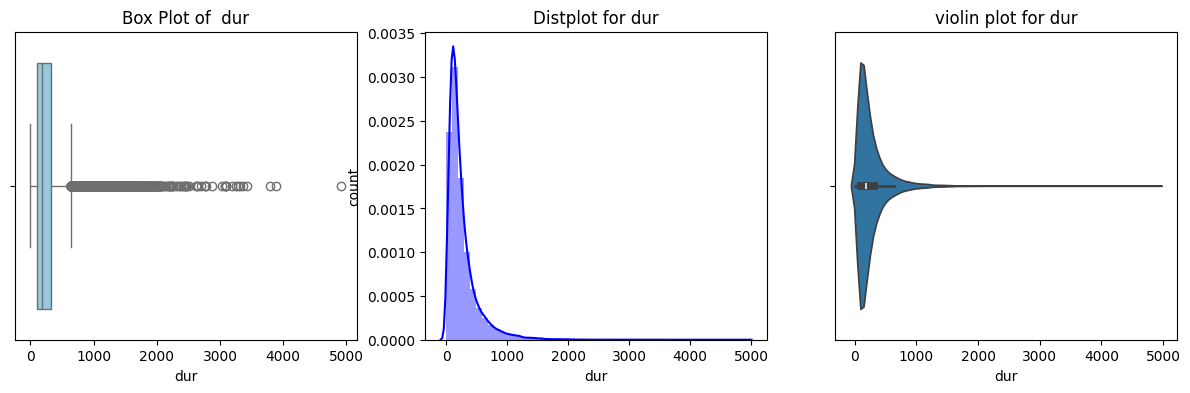

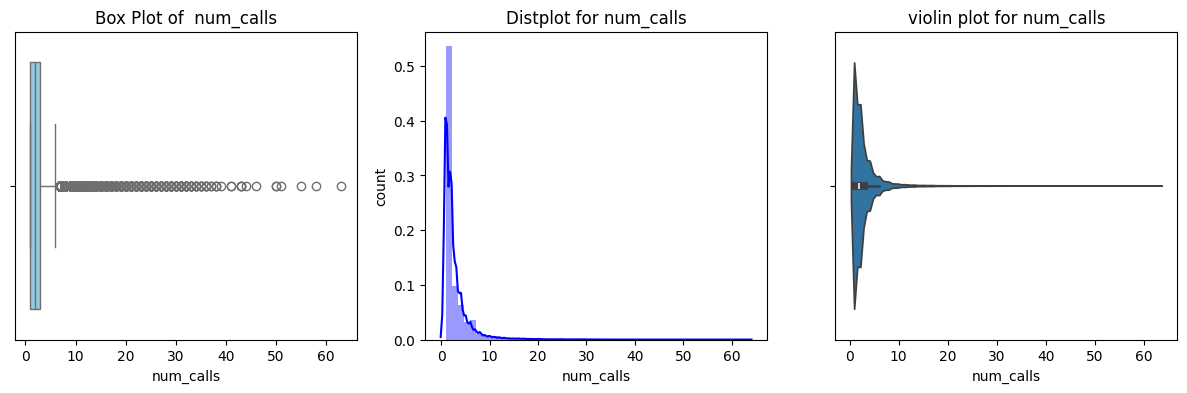

In [94]:
for i in cont_col:
  plot(df,i)

age,dur,num_calls columns having outliers  and skewed

Removing outliers

In [5]:
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")
    df[column] = df[column].clip(lower_threshold, upper_threshold)

    print(df[column].describe())
    print('**********************')

Column : age
UpperThreshold : 70.5 and lowerThreshold : 10.5
count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64
**********************
Column : day
UpperThreshold : 40.5 and lowerThreshold : -11.5
count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64
**********************
Column : dur
UpperThreshold : 643.0 and lowerThreshold : -221.0
count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64
**********************
Column : num_calls
UpperThreshold : 6.0 and lowerThreshold : -2.0
count    45205.000000
mean         2.392235
std          1.600152
min          1.000000


In [96]:
from scipy.stats import skew
for column in cont_col:
  print(f"Column : {column}")
  skewness = skew(df[column])
  print("Skewness:", skewness)

  print("*******************")

Column : age
Skewness: 0.5295210538157077
*******************
Column : day
Skewness: 0.09300545215702359
*******************
Column : dur
Skewness: 1.0373749916112796
*******************
Column : num_calls
Skewness: 1.099109381055628
*******************


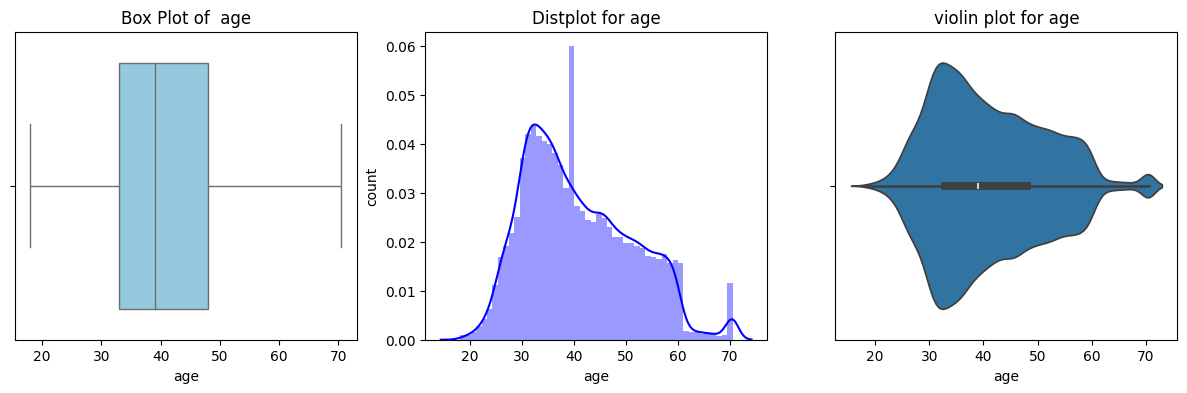

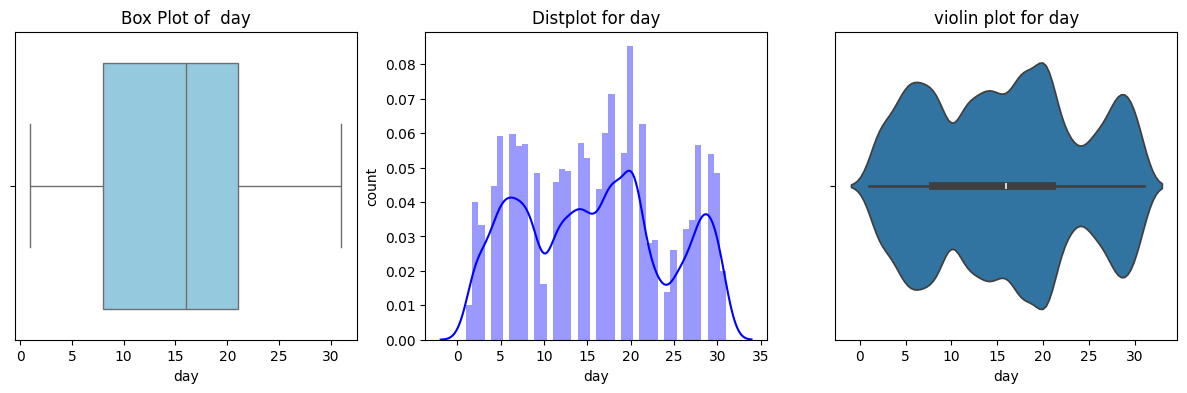

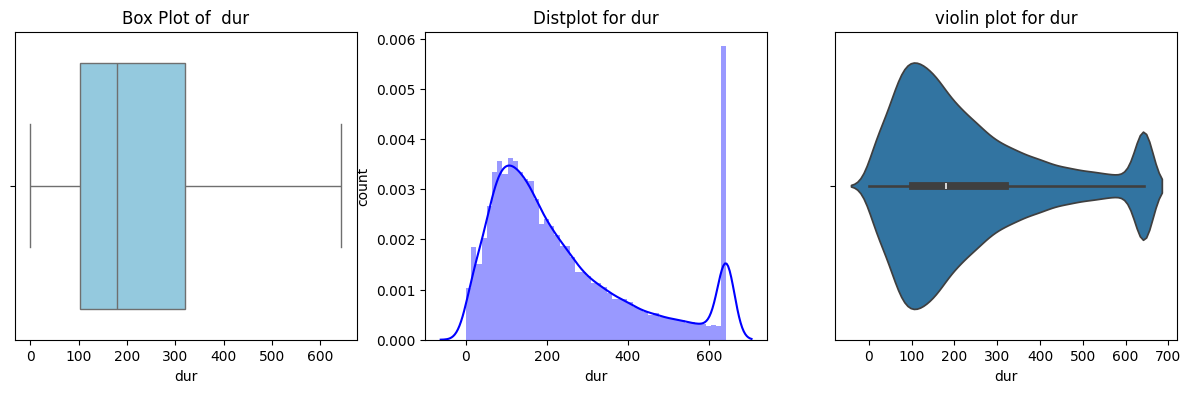

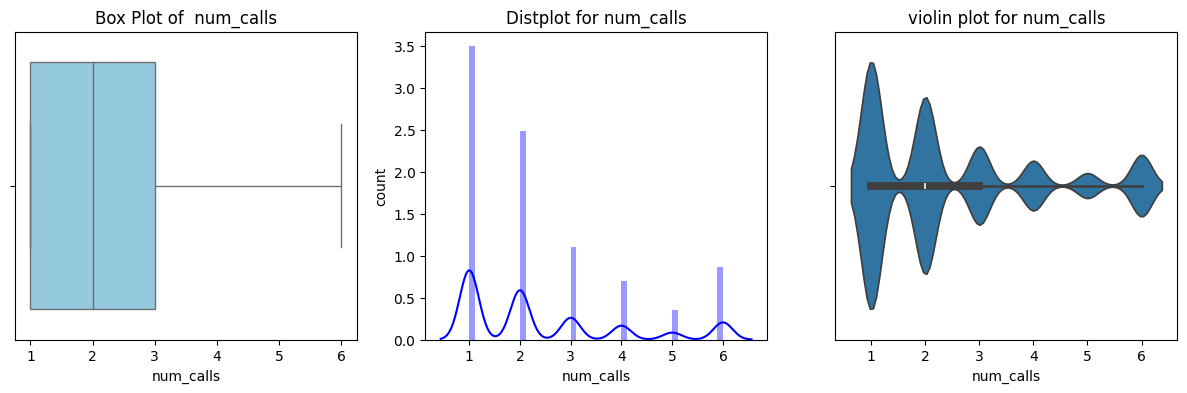

In [97]:
for i in cont_col:
  plot(df,i)

EDA and Encode

<Axes: >

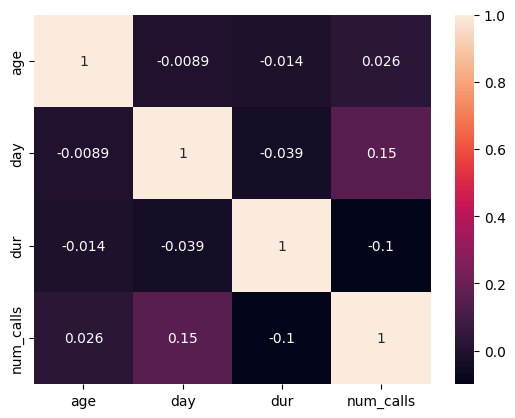

In [6]:
sns.heatmap(df[cont_col].corr(), annot=True)

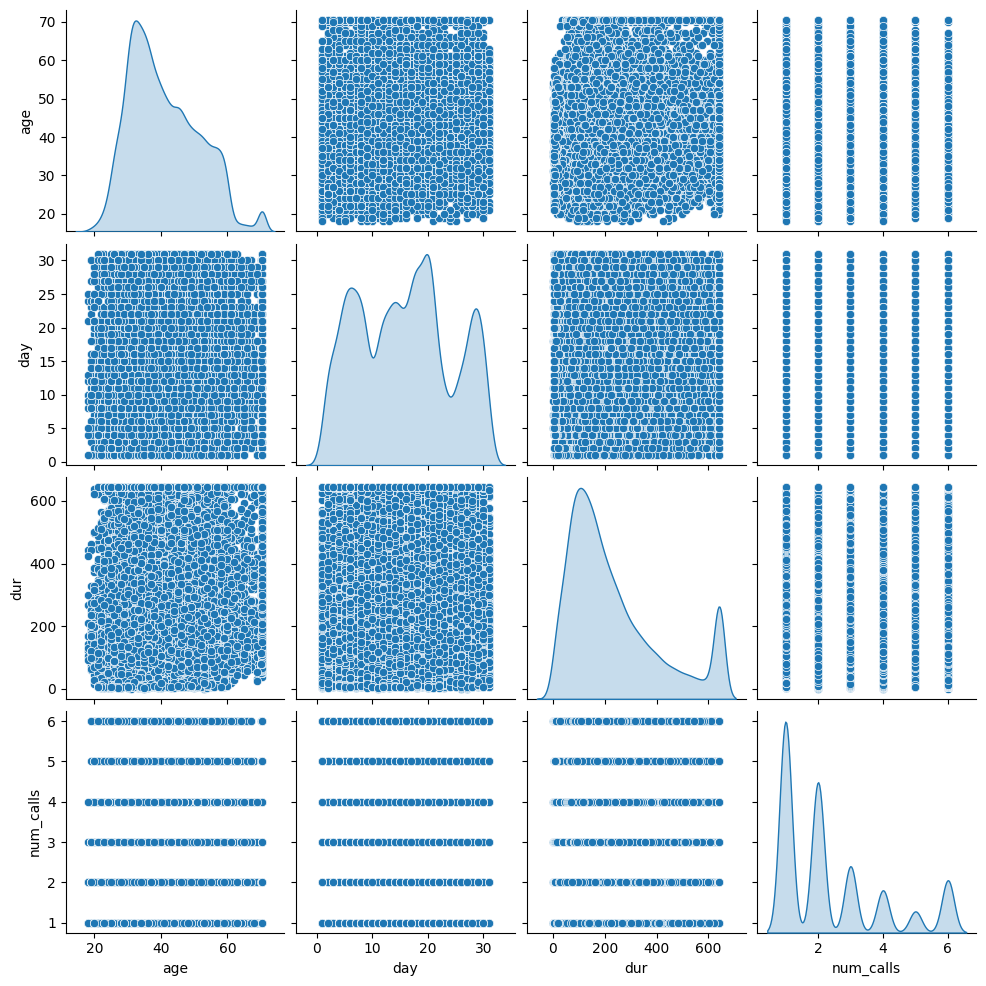

In [7]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
df['y'] = df['y'].map({'yes':0, 'no':1})


age

In [21]:
df.groupby('y')['age'].mean()

y
0    41.410096
1    40.797362
Name: age, dtype: float64

<Axes: xlabel='y'>

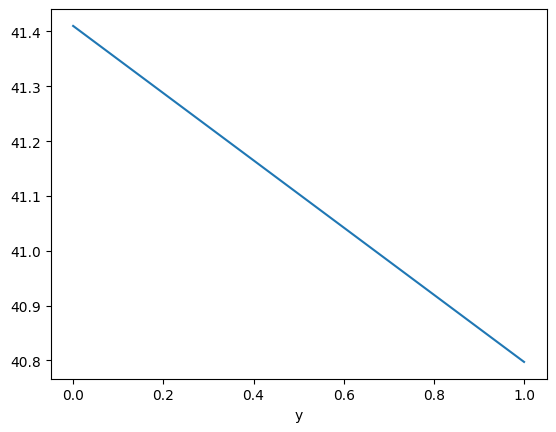

In [22]:
df.groupby('y')['age'].mean().plot()

From this can conclude that people above age 41 will subscribe insurance.And people age below 41 will not subscribe insurance.


day

In [23]:
df.groupby("y")["day"].mean()

y
0    15.158253
1    15.892825
Name: day, dtype: float64

<Axes: xlabel='y'>

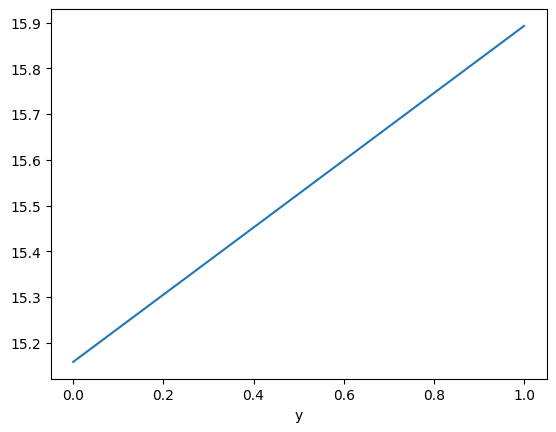

In [24]:
df.groupby("y")["day"].mean().plot()

From this can conclude that days above 15 will not subscribe insurance and days below 15 will subscribe insurance.


dur

In [25]:
df.groupby("y")["dur"].mean()

y
0    424.640953
1    209.822352
Name: dur, dtype: float64

<Axes: xlabel='y'>

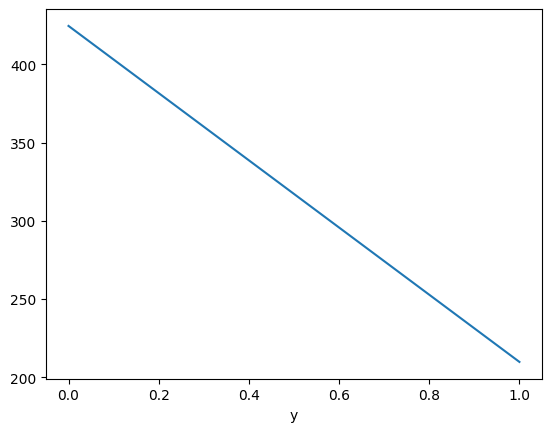

In [26]:
df.groupby("y")["dur"].mean().plot()

From this can conclude that dur above 400 will subscribe insurance and dur below 250 will not subscribe insurance.

num_calls

In [29]:
df.num_calls.value_counts()

num_calls
1    17542
2    12503
3     5521
6     4355
4     3520
5     1764
Name: count, dtype: int64

In [27]:
df.groupby("y")["num_calls"].mean()

y
0    2.022689
1    2.441202
Name: num_calls, dtype: float64

<Axes: xlabel='y'>

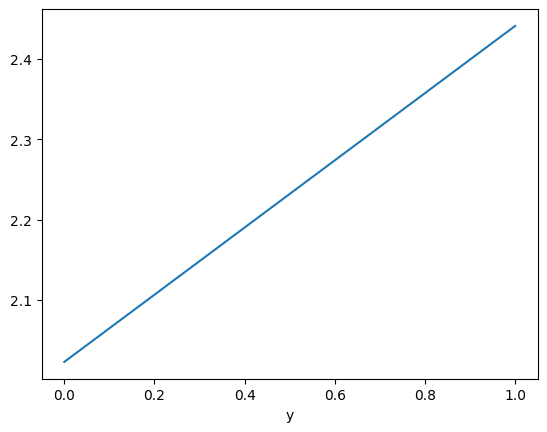

In [28]:
df.groupby("y")["num_calls"].mean().plot()

From this can conclude that num_calls above 2 will not subscribe insurance and num_calls below 2 will subscribe insurance.



In [100]:
df.nunique()

age                54
job                12
marital             3
education_qual      4
call_type           3
day                31
mon                12
dur               644
num_calls           6
prev_outcome        4
y                   2
dtype: int64

job

In [102]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [103]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [104]:
df.groupby('job')['y'].mean()

job
admin.           0.877950
blue-collar      0.927235
entrepreneur     0.917283
housemaid        0.912097
management       0.862430
retired          0.772085
self-employed    0.881571
services         0.911149
student          0.713220
technician       0.889415
unemployed       0.844973
unknown          0.881944
Name: y, dtype: float64

<Axes: xlabel='job'>

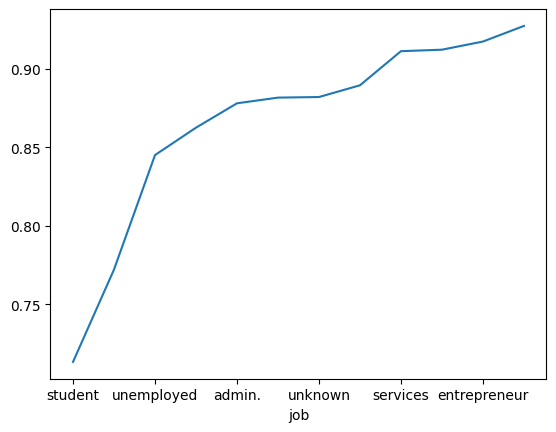

In [9]:
df.groupby('job')['y'].mean().sort_values().plot()

In [30]:
df['job'] = df['job'].map({'management':4, 'technician':8, 'entrepreneur':11, 'blue-collar':12,'unknown':7, 'retired':2, 'admin.':5,
              'services':9, 'self-employed':6,'unemployed':3, 'housemaid':10, 'student':1})

 From this can conclude that ‘student’,’retired’ people are having a high chance to subscribe to insurance policy and ‘blue-collar’, ’entrepreneur’ people will not subscribe insurance.

marital

In [20]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [107]:
df.marital.value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

In [108]:
df.groupby('marital')['y'].mean()


marital
divorced    0.880545
married     0.898750
single      0.850485
Name: y, dtype: float64

<Axes: xlabel='marital'>

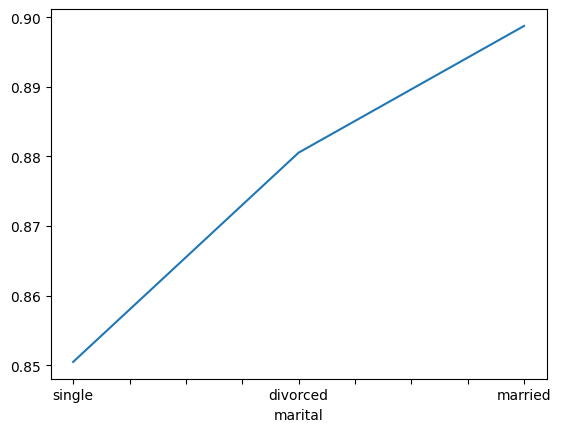

In [10]:
df.groupby('marital')['y'].mean().sort_values().plot()

In [31]:
df['marital'] = df['marital'].map({'single':1,'divorced':2,'married':3})

From this can conclude that ‘single’, ‘divorced’ people are having high chance to subscribe insurance and ‘married’ people will not subscribe insurance.


education_qual

In [110]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
df.education_qual.value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [111]:
df.groupby('education_qual')['y'].mean()

education_qual
primary      0.913723
secondary    0.894392
tertiary     0.849914
unknown      0.864297
Name: y, dtype: float64

<Axes: xlabel='education_qual'>

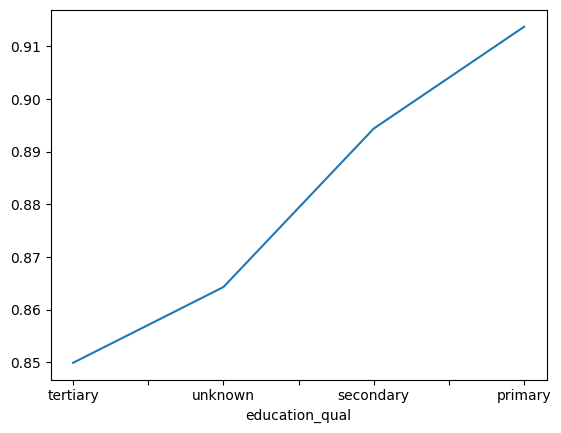

In [12]:
df.groupby('education_qual')['y'].mean().sort_values().plot()

In [32]:
df['education_qual'] = df['education_qual'].map({'tertiary':1, 'secondary':3, 'unknown':2, 'primary':4})

From this can conclude that ‘tertiary’ and ‘unknown’ qualified people have a high chance to subscribe insurance.And ‘secondary’ and ‘primary’ qualified people will not subscribe insurance.



call_type

In [113]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [13]:
df.call_type.value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

In [114]:
df.groupby('call_type')['y'].mean()

call_type
cellular     0.850796
telephone    0.865795
unknown      0.959284
Name: y, dtype: float64

<Axes: xlabel='call_type'>

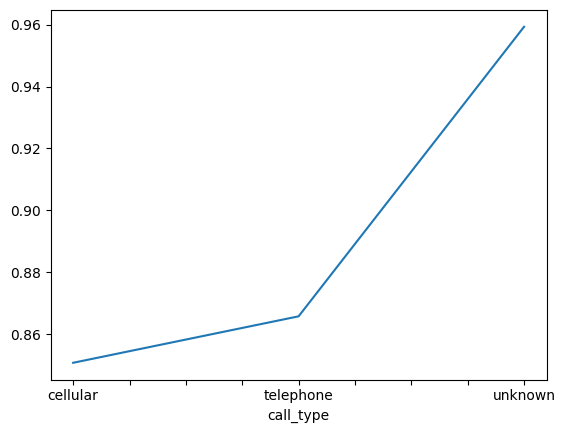

In [14]:
df.groupby('call_type')['y'].mean().sort_values().plot()

In [33]:
df['call_type'] = df['call_type'].map({'unknown':3, 'cellular':1, 'telephone':2})

From this can conclude that call type through ‘cellular’ subscribe insurance and call type through ‘unknown’ will not subscribe insurance.

mon

In [15]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
df.mon.value_counts()

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [116]:
df.groupby('mon')['y'].mean().sort_values()

mon
mar    0.480084
dec    0.532710
sep    0.535406
oct    0.562331
apr    0.803206
feb    0.833522
aug    0.889832
jun    0.897734
nov    0.898489
jan    0.898788
jul    0.909051
may    0.932801
Name: y, dtype: float64

<Axes: xlabel='mon'>

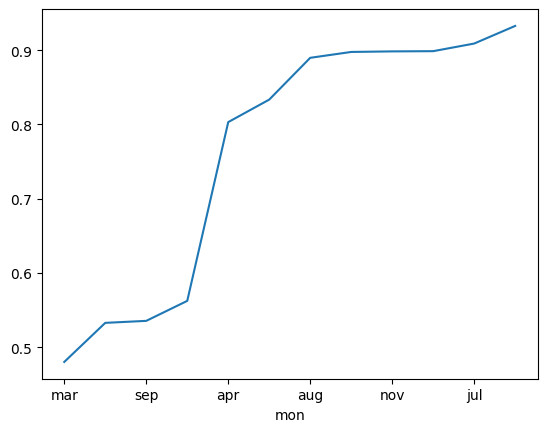

In [17]:
df.groupby('mon')['y'].mean().sort_values().plot()

In [34]:
df['mon']=df['mon'].map({'mar':1,'dec':2,'sep':3,'oct':4,'apr':5,'feb':6,'aug':7,'jun':8,'nov':9,'jan':10,'jul':11,'may':12})

From this can conclude that calls during month ‘mar’ , ’dec’, ’oct’,’sep’ will subscribe insurance and calls during month ’nov’,’jan’, ’jul’, ‘may’ will not subscribe insurance.

prev_outcome

In [126]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [18]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [127]:
df.groupby('prev_outcome')['y'].mean()

prev_outcome
failure    0.873903
other      0.833152
success    0.352747
unknown    0.908370
Name: y, dtype: float64

<Axes: xlabel='prev_outcome'>

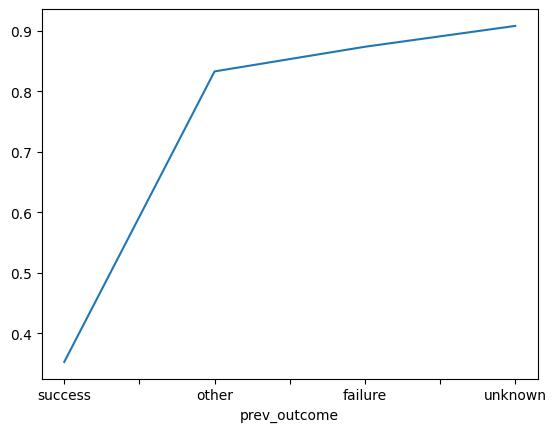

In [19]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot()

In [35]:
df['prev_outcome']=df['prev_outcome'].map({'success':1,'other':2,'failure':3,'unknown':4})

From this can conclude that last call ‘success’ subscribes insurance and last call ‘other’,’failure’,’unknown’ will not subscribe insurance.



save the mapped column(encode)

In [63]:
import pickle
file_path_job = r'C:\Users\balak\guvi\customer\job_mapped.pkl'
with open(file_path_job, 'wb') as file1:
    pickle.dump(df['job'], file1)

file_path_marital = r'C:\Users\balak\guvi\customer\marital_mapped.pkl'
with open(file_path_marital, 'wb') as file2:
    pickle.dump(df['marital'], file2)

file_path_educa = r'C:\Users\balak\guvi\customer\educationqual_mapped.pkl'
with open(file_path_educa, 'wb') as file3:
    pickle.dump(df['education_qual'], file3)

file_path_call = r'C:\Users\balak\guvi\customer\calltype_mapped.pkl'
with open(file_path_call, 'wb') as file4:
    pickle.dump(df['call_type'], file4)

file_path_month = r'C:\Users\balak\guvi\customer\month_mapped.pkl'
with open(file_path_month, 'wb') as file5:
    pickle.dump(df['mon'], file5)

file_path_outcome = r'C:\Users\balak\guvi\customer\previous_outcome_mapped.pkl'
with open(file_path_outcome, 'wb') as file6:
    pickle.dump(df['prev_outcome'], file6)

In [36]:
cont_col=cat_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cont_col

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

<Axes: >

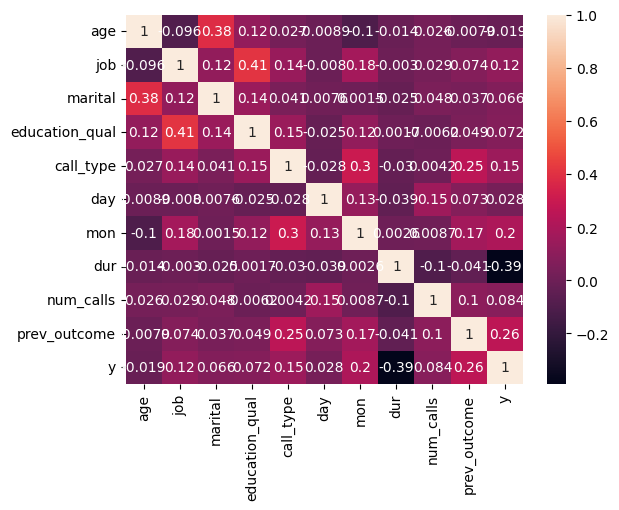

In [37]:
sns.heatmap(df[cont_col].corr(), annot=True)

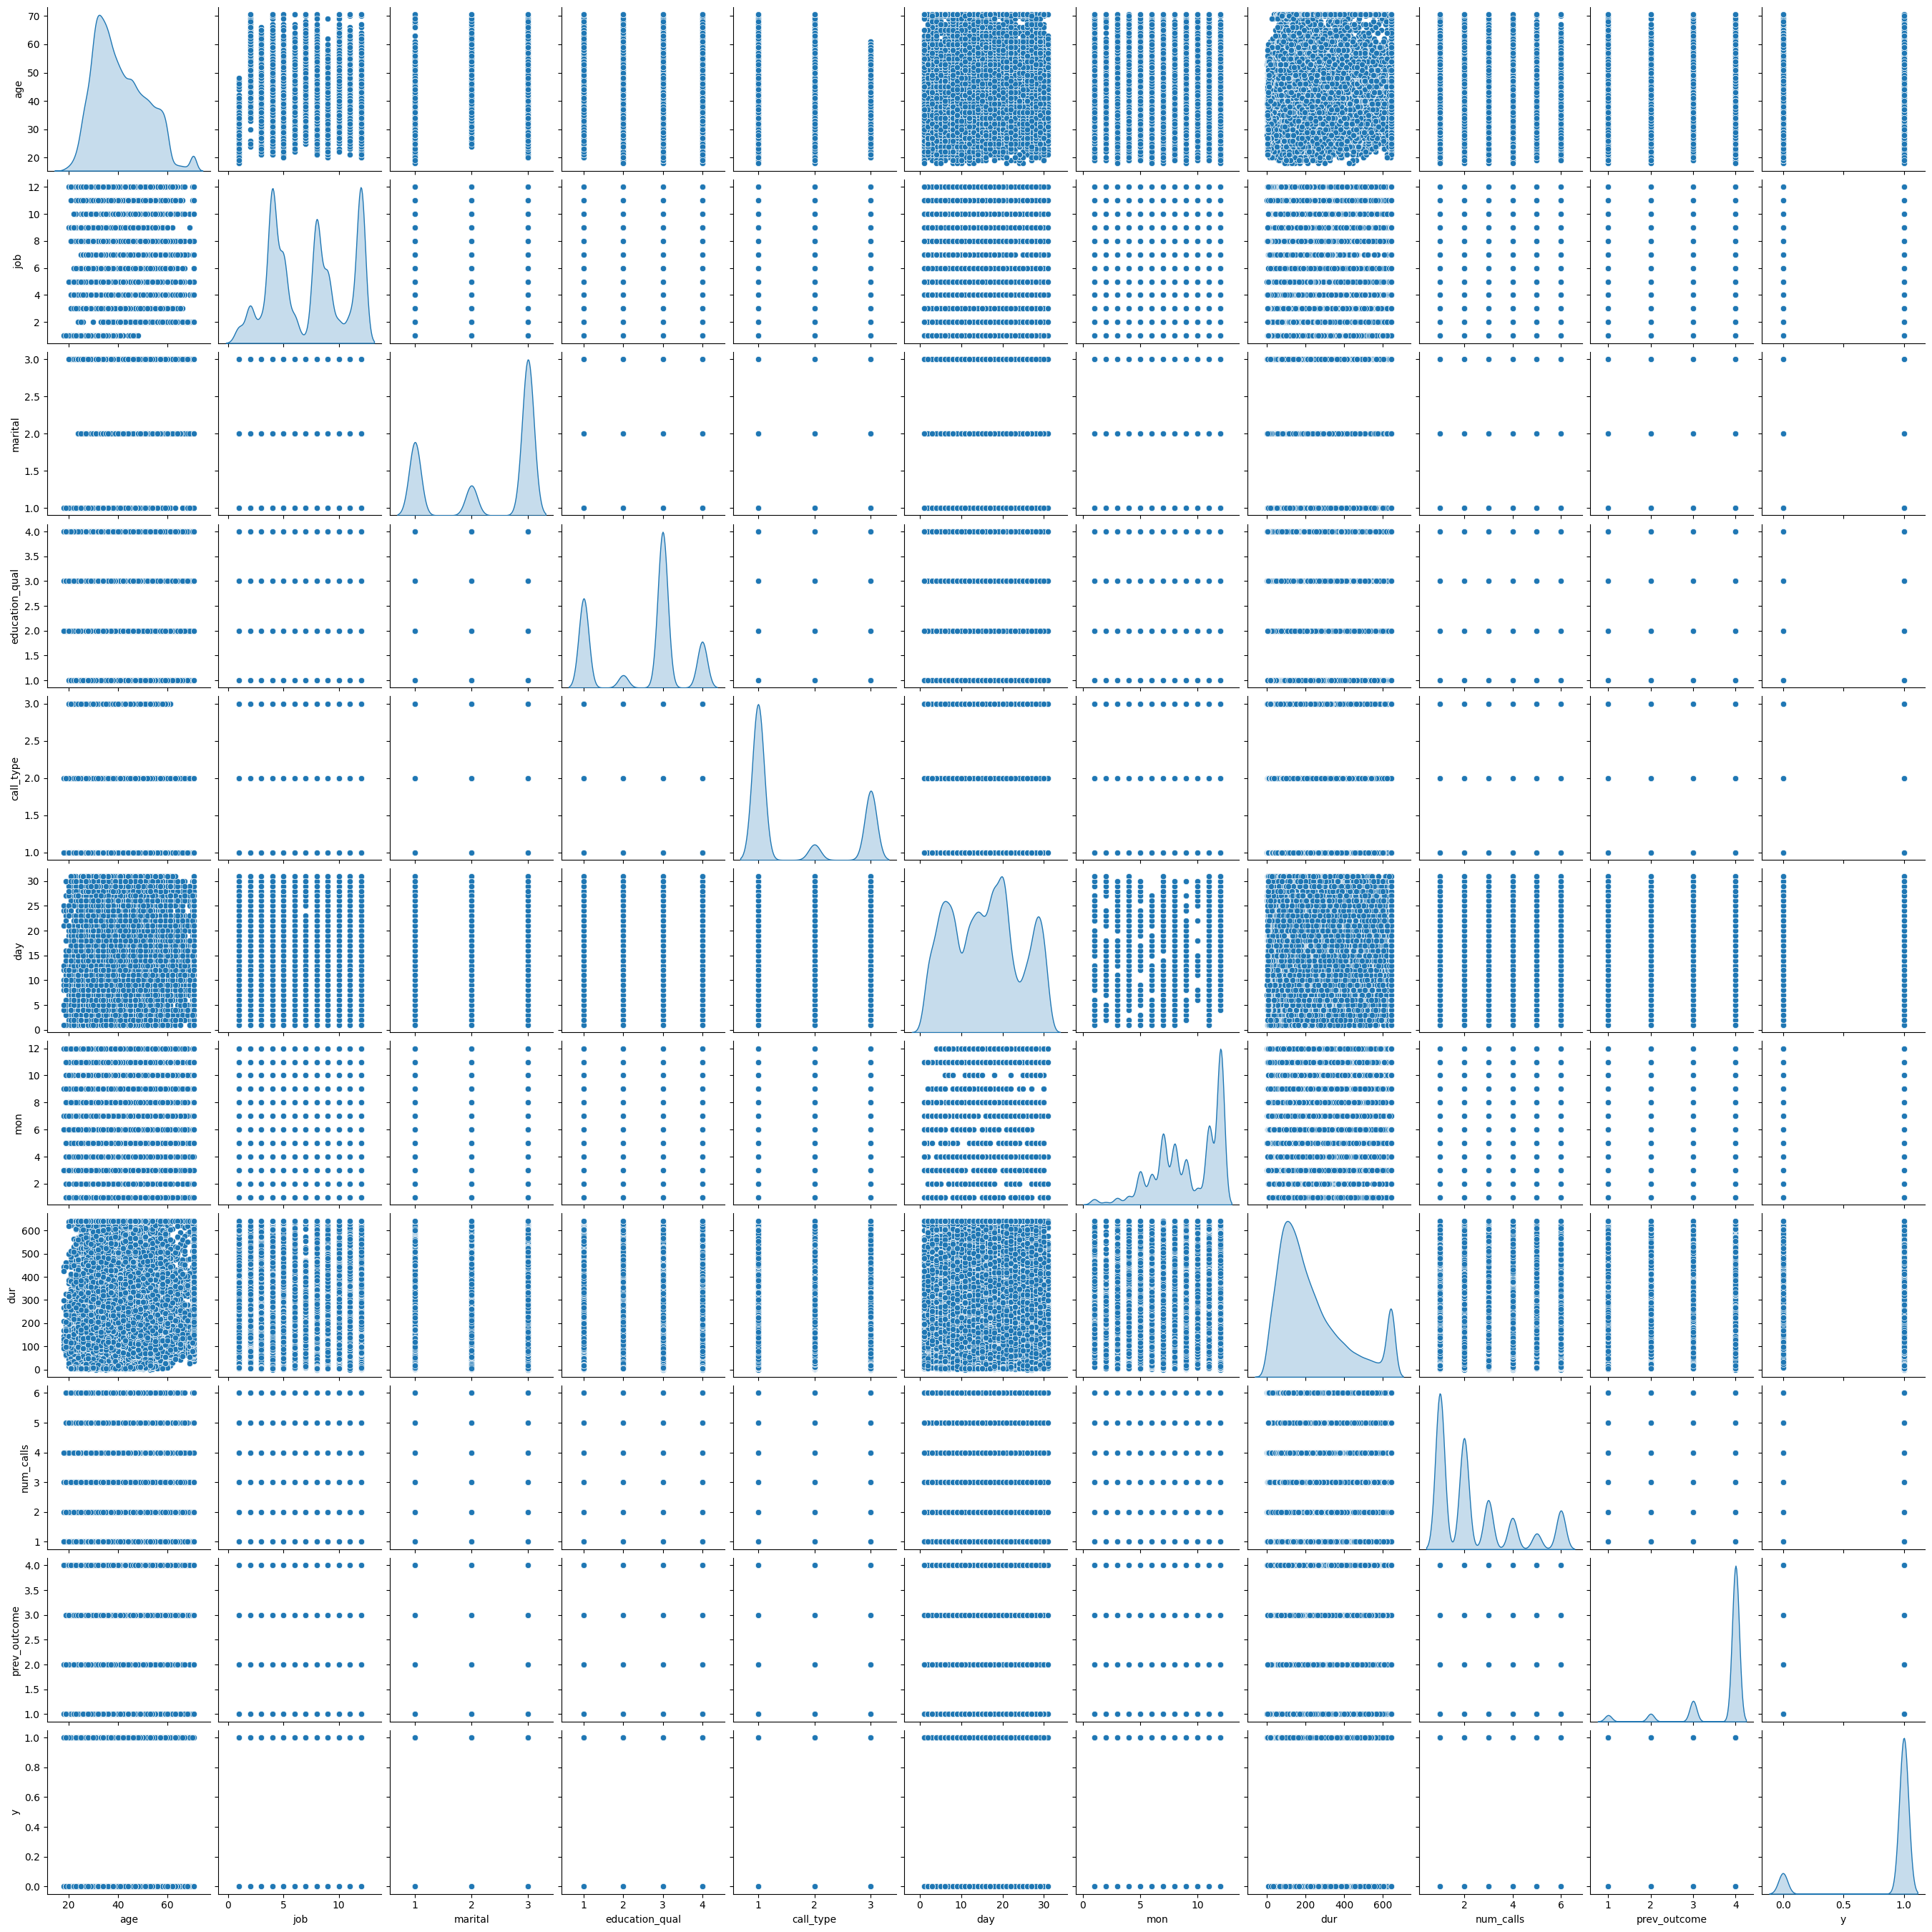

In [38]:
sns.pairplot(df,diag_kind='kde')

Checking imbalanced dataset

In [36]:
df.y.value_counts() / df.shape[0]

y
1    0.883
0    0.117
Name: count, dtype: float64

split

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['y'])
y = df[ 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33903, 10), (11302, 10), (33903,), (11302,))

SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=7)

X_train_smote, y_train_smote = smot.fit_resample(X_train, y_train)

LogisticRegression

In [32]:
logi=LogisticRegression()
logi.fit(X_train_smote, y_train_smote)
y_pred = logi.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9007163703900238
Confusion matrix: [[ 944  335]
 [1536 8487]]
Classification report:               precision    recall  f1-score   support

           0       0.38      0.74      0.50      1279
           1       0.96      0.85      0.90     10023

    accuracy                           0.83     11302
   macro avg       0.67      0.79      0.70     11302
weighted avg       0.90      0.83      0.86     11302



DecisionTreeClassifier

In [33]:
dec=DecisionTreeClassifier()
dec.fit(X_train_smote, y_train_smote)
y_pred = dec.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9187170699268504
Confusion matrix: [[ 733  546]
 [1043 8980]]
Classification report:               precision    recall  f1-score   support

           0       0.41      0.57      0.48      1279
           1       0.94      0.90      0.92     10023

    accuracy                           0.86     11302
   macro avg       0.68      0.73      0.70     11302
weighted avg       0.88      0.86      0.87     11302



Fine Tuned Hyperparameters

In [43]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  dtr = DecisionTreeClassifier(max_depth = depth)
  dtr.fit(X_train_smote, y_train_smote)
  train_score = dtr.score(X_train_smote, y_train_smote)
  cross_val = np.mean(cross_val_score(dtr, X_train_smote, y_train_smote, cv = 15))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.718345432040946, Cross-ValScore: 0.7183453756907017
Depth - 2, TrainScore: 0.7761348810758372, Cross-ValScore: 0.7761351010426917
Depth - 3, TrainScore: 0.8032649784230422, Cross-ValScore: 0.8028803404974707
Depth - 4, TrainScore: 0.8265647475997725, Cross-ValScore: 0.8269333298078198
Depth - 5, TrainScore: 0.8541799083397451, Cross-ValScore: 0.8528590719966558
Depth - 6, TrainScore: 0.8639648078145385, Cross-ValScore: 0.8621254146937957
Depth - 7, TrainScore: 0.8725621382932459, Cross-ValScore: 0.8679128182431903
Depth - 8, TrainScore: 0.887331482286823, Cross-ValScore: 0.8799558009704815
Depth - 9, TrainScore: 0.8948750543605526, Cross-ValScore: 0.8847730796810166
Depth - 10, TrainScore: 0.9077543237547252, Cross-ValScore: 0.8906941799434785
Depth - 11, TrainScore: 0.9176563074967383, Cross-ValScore: 0.8938052695097836
Depth - 12, TrainScore: 0.9304017662998026, Cross-ValScore: 0.8994421378211445
Depth - 13, TrainScore: 0.9422607299367745, Cross-ValScore: 0.9

In [44]:
from sklearn.model_selection import cross_val_score

for depth in [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dtr = DecisionTreeClassifier(max_depth = depth)
  dtr.fit(X_train_smote, y_train_smote)
  train_score = dtr.score(X_train_smote, y_train_smote)
  cross_val = np.mean(cross_val_score(dtr, X_train_smote, y_train_smote, cv = 15))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 15, TrainScore: 0.9618138025624728, Cross-ValScore: 0.9059987161254269
Depth - 16, TrainScore: 0.9705282173084, Cross-ValScore: 0.9074707775835248
Depth - 17, TrainScore: 0.9773525574549226, Cross-ValScore: 0.9080227135417289
Depth - 18, TrainScore: 0.9839260027431171, Cross-ValScore: 0.9086750133203562
Depth - 19, TrainScore: 0.9879737731241428, Cross-ValScore: 0.9084575940509474
Depth - 20, TrainScore: 0.9918710065901716, Cross-ValScore: 0.9073536549818971
Depth - 21, TrainScore: 0.9941290603151239, Cross-ValScore: 0.9080729017475005
Depth - 22, TrainScore: 0.9958518716756432, Cross-ValScore: 0.9068685065231445
Depth - 23, TrainScore: 0.9969223564045094, Cross-ValScore: 0.9073703675956605
Depth - 24, TrainScore: 0.997909209513933, Cross-ValScore: 0.9074874776061679
Depth - 25, TrainScore: 0.9985113571739204, Cross-ValScore: 0.9082568831982621
Depth - 26, TrainScore: 0.9990298732144649, Cross-ValScore: 0.9073369381710937
Depth - 27, TrainScore: 0.9993142207205701, Cross-ValSco

In [47]:
dtc=DecisionTreeClassifier(max_depth=18)
dtc.fit(X_train_smote, y_train_smote)
y_pred = dtc.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9211865713845047
Confusion matrix: [[ 810  469]
 [1064 8959]]
Classification report:               precision    recall  f1-score   support

           0       0.43      0.63      0.51      1279
           1       0.95      0.89      0.92     10023

    accuracy                           0.86     11302
   macro avg       0.69      0.76      0.72     11302
weighted avg       0.89      0.86      0.88     11302



Feature importaance

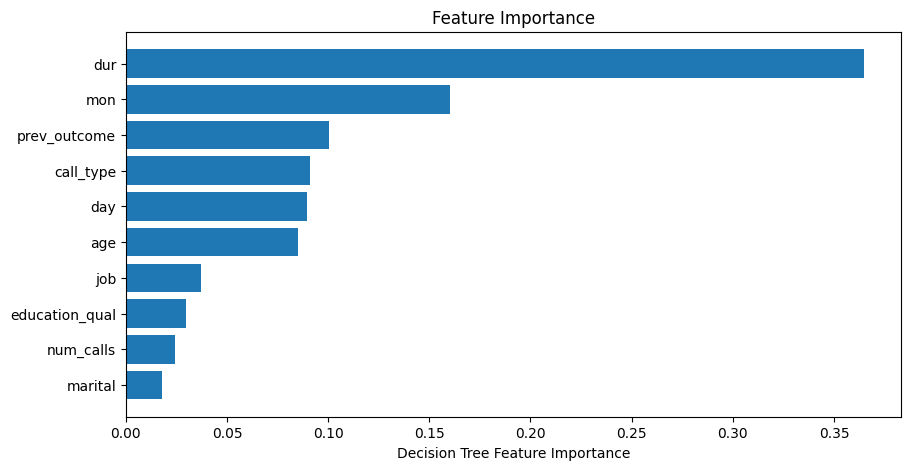

In [67]:
sorted_idx = dtc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], dtc.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.title("Feature Importance")

plt.show()

RandomForestClassifier

In [34]:
ran=RandomForestClassifier()
ran.fit(X_train_smote, y_train_smote)
y_pred = ran.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9329923273657289
Confusion matrix: [[ 872  407]
 [ 903 9120]]
Classification report:               precision    recall  f1-score   support

           0       0.49      0.68      0.57      1279
           1       0.96      0.91      0.93     10023

    accuracy                           0.88     11302
   macro avg       0.72      0.80      0.75     11302
weighted avg       0.90      0.88      0.89     11302



Fine Tuned Hyperparameters

In [49]:
rfr = RandomForestClassifier(max_depth = 18, max_features = "log2")

for n in [10, 20, 50, 100, 200, 500]:
  rfr = RandomForestClassifier(n_estimators = n, max_depth = 18, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train_smote, y_train_smote, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9242640616082911
N: 20, Cross-Val Score: 0.9280775062445334
N: 50, Cross-Val Score: 0.9296162894430721
N: 100, Cross-Val Score: 0.9307370264532979
N: 200, Cross-Val Score: 0.9307537824339018
N: 500, Cross-Val Score: 0.930686828456305


In [50]:
rfr = RandomForestClassifier(max_depth = 20, max_features = "log2")

for n in [10, 20, 50, 100, 200, 500]:
  rfr = RandomForestClassifier(n_estimators = n, max_depth = 20, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train_smote, y_train_smote, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9258027049171934
N: 20, Cross-Val Score: 0.9287465424178111
N: 50, Cross-Val Score: 0.9319245691581068
N: 100, Cross-Val Score: 0.9320416511878784
N: 200, Cross-Val Score: 0.9328611890249755
N: 500, Cross-Val Score: 0.9331623210510793


In [53]:
rfr = RandomForestClassifier(max_depth = 25, max_features = "log2")

for n in [10, 20, 50, 100, 200, 500]:
  rfr = RandomForestClassifier(n_estimators = n, max_depth = 25, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train_smote, y_train_smote, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9255852073088867
N: 20, Cross-Val Score: 0.9302184443813635
N: 50, Cross-Val Score: 0.9328778834541392
N: 100, Cross-Val Score: 0.9342327901194943
N: 200, Cross-Val Score: 0.9339317672073066
N: 500, Cross-Val Score: 0.9341826312915995


In [83]:
rfc=RandomForestClassifier(n_estimators = 500, max_depth = 25, max_features = "log2")
rfc.fit(X_train_smote, y_train_smote)
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9339473011000256
Confusion matrix: [[ 884  395]
 [ 896 9127]]
Classification report:               precision    recall  f1-score   support

           0       0.50      0.69      0.58      1279
           1       0.96      0.91      0.93     10023

    accuracy                           0.89     11302
   macro avg       0.73      0.80      0.76     11302
weighted avg       0.91      0.89      0.89     11302



Feature importance

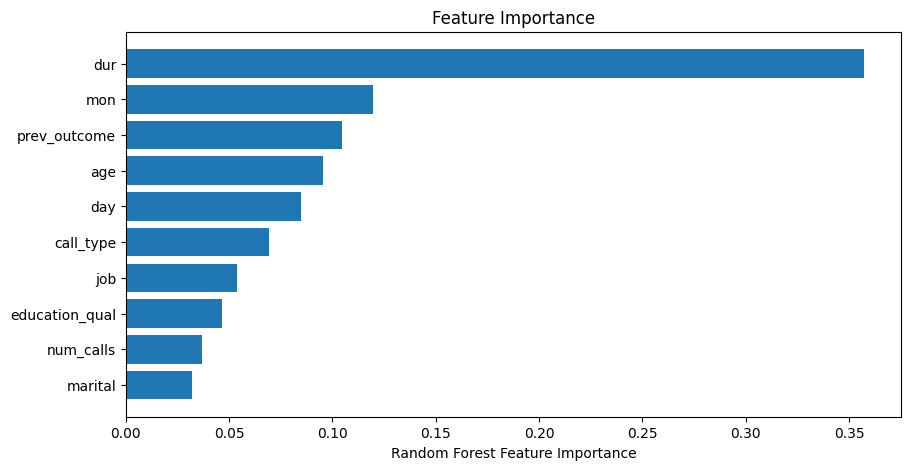

In [55]:
sorted_idx =rfc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

XGBClassifier

In [35]:
xgb=XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)
y_pred = xgb.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9378427787934186
Confusion matrix: [[ 844  435]
 [ 789 9234]]
Classification report:               precision    recall  f1-score   support

           0       0.52      0.66      0.58      1279
           1       0.96      0.92      0.94     10023

    accuracy                           0.89     11302
   macro avg       0.74      0.79      0.76     11302
weighted avg       0.91      0.89      0.90     11302



Fine Tuned Hyperparameters

In [56]:

for lamb in [0,0.5,1,1.5]:
  xgb = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgb, X_train_smote, y_train_smote, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: 0.49994982438534874
Lambda: 0.5, Cross-Val Score: 0.9317078045714926
Lambda: 1, Cross-Val Score: 0.9311726791512012
Lambda: 1.5, Cross-Val Score: 0.9257700462827658


In [57]:
for lamb in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  xgb = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgb, X_train_smote, y_train_smote, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.9161183860250031
Lambda: 0.2, Cross-Val Score: 0.926405360660382
Lambda: 0.3, Cross-Val Score: 0.9297005225885112
Lambda: 0.4, Cross-Val Score: 0.9320088750461565
Lambda: 0.5, Cross-Val Score: 0.9317078045714926
Lambda: 0.6, Cross-Val Score: 0.9331797848732413
Lambda: 0.7, Cross-Val Score: 0.932293239900486
Lambda: 0.8, Cross-Val Score: 0.9323768575315265
Lambda: 0.9, Cross-Val Score: 0.9323769498586862


In [59]:
xgbc=XGBClassifier(learning_rate = 0.6)
xgbc.fit(X_train_smote, y_train_smote)
y_pred = xgbc.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
con=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', con)
rep=classification_report(y_test,y_pred)
print("Classification report:",rep)

F1 score: 0.9383451059535822
Confusion matrix: [[ 781  498]
 [ 724 9299]]
Classification report:               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1279
           1       0.95      0.93      0.94     10023

    accuracy                           0.89     11302
   macro avg       0.73      0.77      0.75     11302
weighted avg       0.90      0.89      0.90     11302



Save the model

In [61]:
import pickle

file_xgb_hyp = r'C:\Users\balak\guvi\customer\xgbclassifier_hyp.pkl'
with open(file_xgb_hyp, 'wb') as file:
    pickle.dump(xgbc, file)

Feature importance

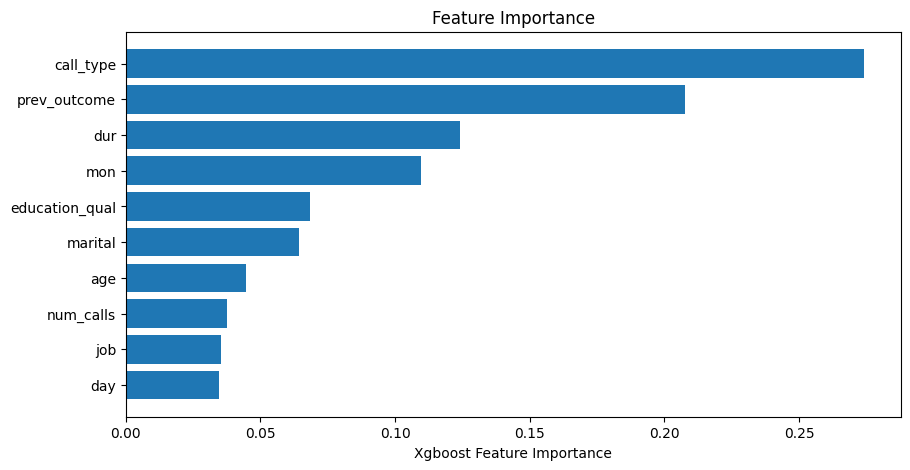

In [60]:
sorted_idx = xgbc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], xgbc.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Feature Importance")

plt.show()

So the best model is XGBClassifier